# Q1 - signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_time(x, fs):
    n = len(x)
    t = np.arange(n) / fs

    plt.figure(figsize=(8, 4))
    plt.xlabel('time in seconds')
    plt.ylabel('amplitude')
    plt.plot(t, x)
    plt.title('Signal in Time Domain')
    plt.grid()
    plt.show()

In [2]:
def plot_freq(X, fs):
    N = len(X)

    f = np.fft.fftfreq(N, 1/fs)

    f = np.fft.fftshift(f)
    X = np.fft.fftshift(X)

    amplitude = np.abs(X)
    phase = np.angle(X)

    phase[amplitude < 0.01] = 0

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.set_xlabel('Frequency in Hz')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Amplitude Spectrum')
    ax1.plot(f, amplitude)
    ax1.grid()

    ax2.set_xlabel('Frequency in Hz')
    ax2.set_ylabel('Phase in Rads')
    ax2.set_title('Phase Spectrum')
    ax2.plot(f, phase)
    ax2.grid()

    plt.tight_layout()
    plt.show()

# plot time

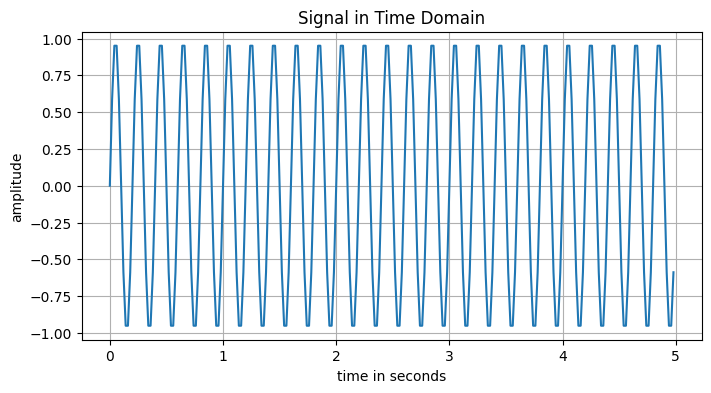

In [3]:
fs = 50
n = 5 * fs

t = np.arange(n) / fs

x = np.sin(2 * np.pi * 5 * t)

plot_time(x, fs)

# plot frequency

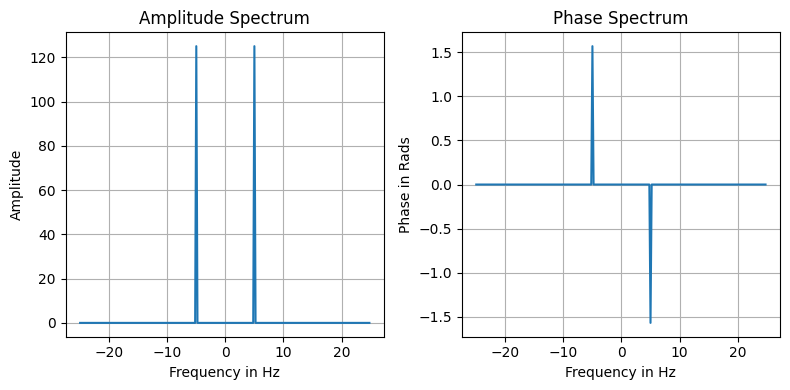

In [4]:
X = np.fft.fft(x)

plot_freq(X, fs)

# Q2 - Convolution

In [5]:
def convolution(x, h, domain, overlap, periodic):

    def DFT(x):
        N = len(x)

        X = np.zeros(N, dtype='complex')

        for k in range (N):
            for n in range (N):
                X[k] += x[n] * np.exp(-1j* 2 * np.pi * k * n / N)

        return X

    def iDFT(X):
        N = len(X)

        x = np.zeros(N, dtype='complex')

        for n in range (N):
            for k in range (N):
                x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
        return x / N

    def conv(x, h, overlap, period):
        if overlap and period:
            N = max(len(x), len(h))

            if len(x) < N:
                x = np.pad(x, (0, N - len(x)), mode='constant')
            if len(h) < N:
                h = np.pad(h, (0, N - len(h)), mode='constant')

            y = np.zeros(N)

            for n in range (N):
                for m in range (len(h)):
                    y[n] += x[m] * h[(n-m) % N]
            return y
            
        elif overlap and not period :
            N = len(x) - len(h) + 1

            y = np.zeros(N)

            for n in range (N):
                for k in range (len(h)):
                    y[n] += x[n+k] * h[len(h) - 1 - k]
            return y
            
        elif not overlap and not period:
            N = len(x) + len(h) - 1

            y = np.zeros(N)

            for n in range (N):
                for k in range (len(x)):
                    if 0<=n-k<len(h):
                        y[n] += x[k] * h[n-k]
            return y
            
        else:
            print("Wrong can't be overlap = false and periodic = true")

    def CONV(x, h, overlap, period):
        if overlap and period:
            N = max(len(x), len(h))
            x = np.pad(x, (0, N - len(x)), mode='constant')
            h = np.pad(h, (0, N - len(h)), mode='constant')
        elif not overlap and not period:
            N = len(x) + len(h) - 1
            x = np.pad(x, (0, N - len(x)), mode='constant')
            h = np.pad(h, (0, N - len(h)), mode='constant')
        else:
            print("Wrong inputs")

        X = DFT(x)
        H = DFT(h)
            
        y = np.zeros(N, dtype='complex')

        for k in range (N):
            y[k] = X[k] * H[k]

        y = iDFT(y)

        return y.real

    if domain == 'temporal':
        return conv(x, h, overlap, periodic)
    elif domain == 'spectral':
        return CONV(x, h, overlap, periodic)
    else:
        print('wrong domain input')
        

In [6]:
def DFT(x):
    N = len(x)

    X = np.zeros(N, dtype='complex')

    for k in range (N):
        for n in range (N):
            X[k] += x[n] * np.exp(-1j* 2 * np.pi * k * n / N)

    return X
    
x = [1, 2, 0, 1]
h = [2, 2, 1, 1]

y_q = convolution(x, h, 'temporal', False, False)
print(f'Question results: {y_q}')

y_np = np.convolve(x, h, mode='full')
print(f'Numpy results   : {y_np}')

Question results: [2. 6. 5. 5. 4. 1. 1.]
Numpy results   : [2 6 5 5 4 1 1]


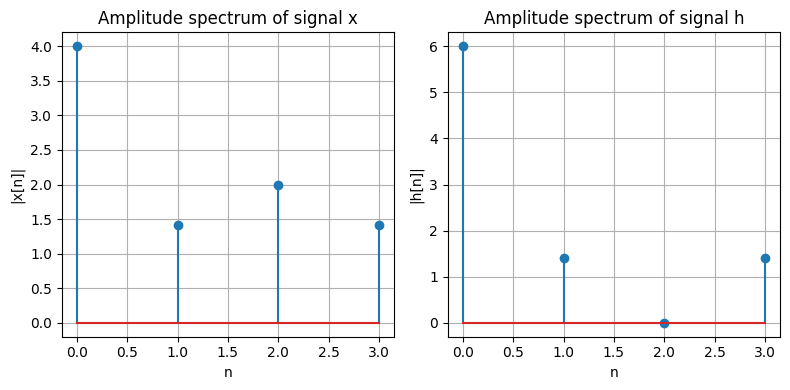

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.stem(np.abs(DFT(x)))
ax1.set_xlabel('n')
ax1.set_ylabel('|x[n]|')
ax1.set_title('Amplitude spectrum of signal x')
ax1.grid()

ax2.stem(np.abs(DFT(h)))
ax2.set_xlabel('n')
ax2.set_ylabel('|h[n]|')
ax2.set_title('Amplitude spectrum of signal h')
ax2.grid()

plt.tight_layout()
plt.show()

Convolution in Temporal:  [2. 6. 5. 5. 4. 1. 1.]
Convolution in Spectral:  [2. 6. 5. 5. 4. 1. 1.]


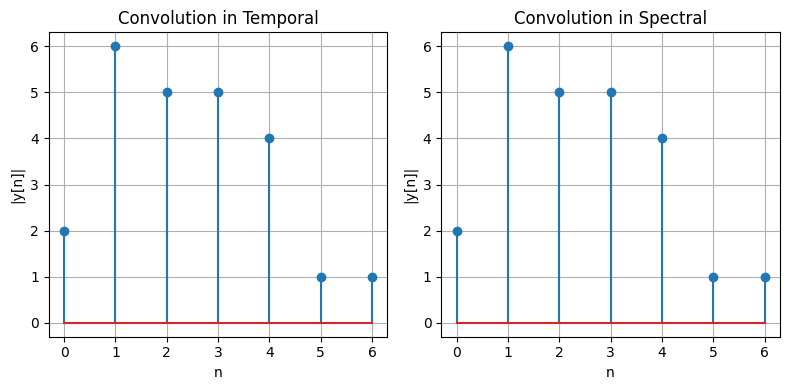

In [8]:
y_t = convolution(x, h, 'temporal', False, False)
y_s = convolution(x, h, 'spectral', False, False)

print(f'Convolution in Temporal:  {y_t}')
print(f'Convolution in Spectral:  {y_s}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.set_xlabel('n')
ax1.set_ylabel('|y[n]|')
ax1.set_title('Convolution in Temporal')
ax1.grid()
ax1.stem(y_t)

ax2.set_xlabel('n')
ax2.set_ylabel('|y[n]|')
ax2.set_title('Convolution in Spectral')
ax2.grid()
ax2.stem(y_s)

plt.tight_layout()
plt.show()

In [9]:
y_l_v = convolution(x, h, 'temporal', True, False)
print(f'Question VALID results: {y_l_v}')

y_np_v = np.convolve(x, h, mode='valid')
print(f'Numpy VALID results   : {y_np_v}')

y_l_f = convolution(x, h, 'temporal', False, False)
print(f'Question FULL results : {y_l_f}')

y_np_f = np.convolve(x, h, mode='full')
print(f'Numpy FULL results    : {y_np_f}')

print('The results of VALID convolution are match   :', np.allclose(y_l_v, y_np_v))
print('What is the difference between them          ?', y_l_v - y_np_v)
print('The results of FULL convolution are match    :', np.allclose(y_l_f, y_np_f))
print('What is the difference between them          ?', y_l_f - y_np_f)

Question VALID results: [5.]
Numpy VALID results   : [5]
Question FULL results : [2. 6. 5. 5. 4. 1. 1.]
Numpy FULL results    : [2 6 5 5 4 1 1]
The results of VALID convolution are match   : True
What is the difference between them          ? [0.]
The results of FULL convolution are match    : True
What is the difference between them          ? [0. 0. 0. 0. 0. 0. 0.]


In [10]:
y_t = convolution(x, h, 'temporal', False, False)
y_s = convolution(x, h, 'spectral', False, False)

print('The results drived from temporal and spectral convolutions are the same  :', np.allclose(y_t, y_s))
print('The difference between them is                                           ?', np.round(y_s - y_t))

The results drived from temporal and spectral convolutions are the same  : True
The difference between them is                                           ? [ 0.  0.  0.  0.  0. -0. -0.]


# Q3 - Spectral Analysis: Discrete Fourier Transform

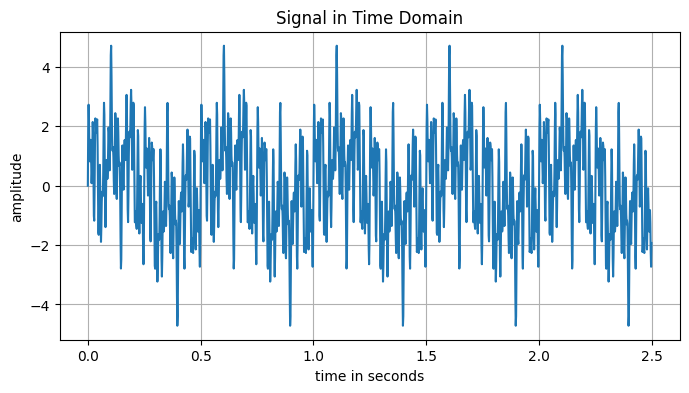

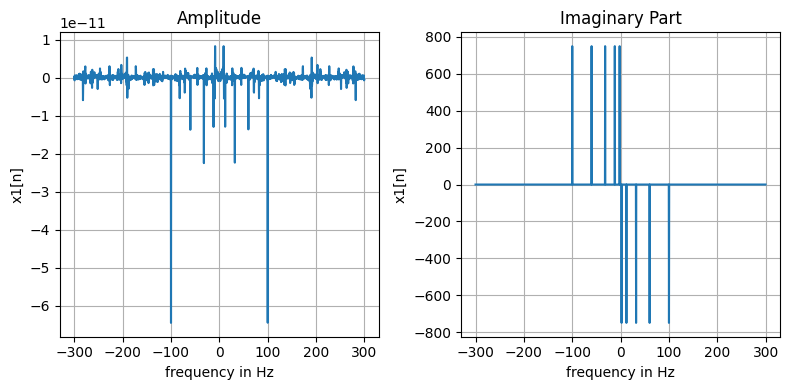

In [11]:
ks = [5, 30, 80, 150, 250]

N = 1500
fs = 600
n = np.arange(N)

x1 = np.zeros(N)

for k in (ks):
    x1 += np.sin(2 * np.pi * k / N * n)

plot_time(x1, fs)

X1 = np.fft.fft(x1)
X1 = np.fft.fftshift(X1)
f = np.fft.fftfreq(N, 1/fs)
f = np.fft.fftshift(f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_xlabel('frequency in Hz')
ax1.set_ylabel('x1[n]')
ax1.set_title('Amplitude')
ax1.grid()
ax1.plot(f, X1.real)

ax2.set_xlabel('frequency in Hz')
ax2.set_ylabel('x1[n]')
ax2.set_title('Imaginary Part')
ax2.grid()
ax2.plot(f, X1.imag)

plt.tight_layout()
plt.show()

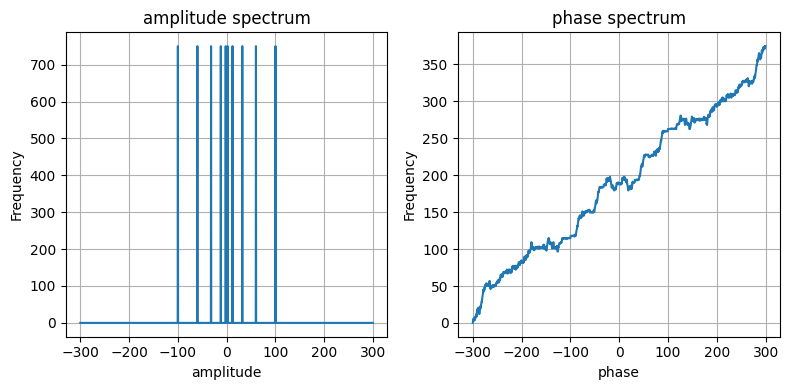

In [12]:
amplitude = np.abs(X1)
phase = np.unwrap(np.angle(X1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_xlabel('amplitude')
ax1.set_ylabel('Frequency')
ax1.set_title('amplitude spectrum')
ax1.grid()
ax1.plot(f, amplitude)

ax2.set_xlabel('phase')
ax2.set_ylabel('Frequency')
ax2.set_title('phase spectrum')
ax2.grid()
ax2.plot(f, phase)

plt.tight_layout()
plt.show()

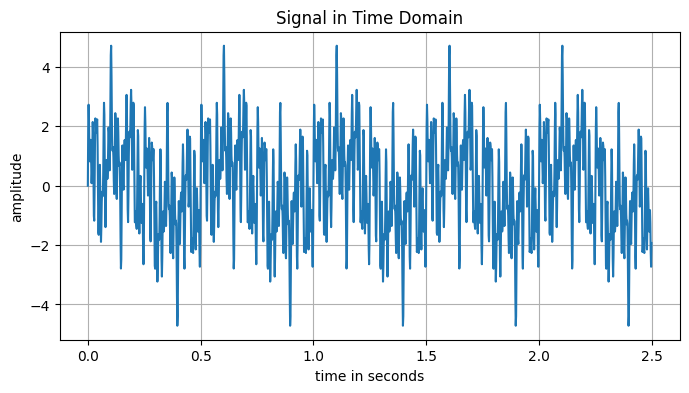

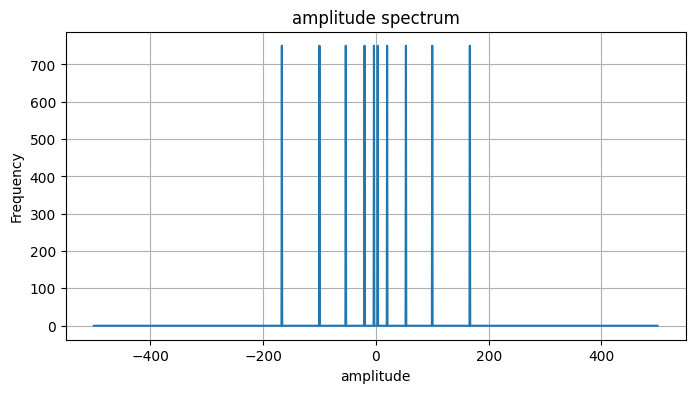

In [13]:
x2 = x1
fs2 = 1000

plot_time(x2, fs)

X2 = np.fft.fft(x2)
X2 = np.fft.fftshift(X2)

f2 = np.fft.fftfreq(N, 1/fs2)
f2 = np.fft.fftshift(f2)

plt.figure(figsize=(8, 4))
plt.plot(f2, np.abs(X2))
plt.xlabel('amplitude')
plt.ylabel('Frequency')
plt.title('amplitude spectrum')
plt.grid()

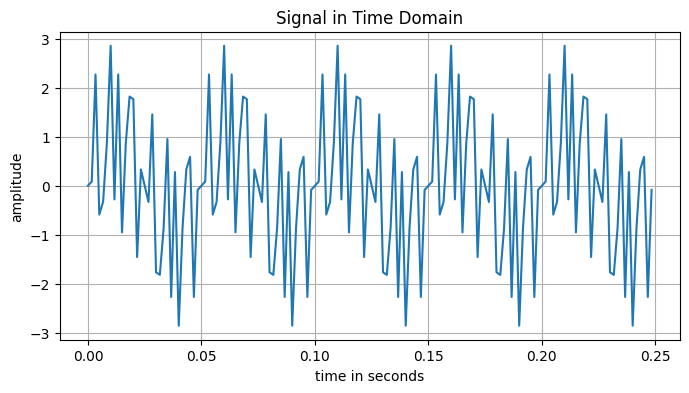

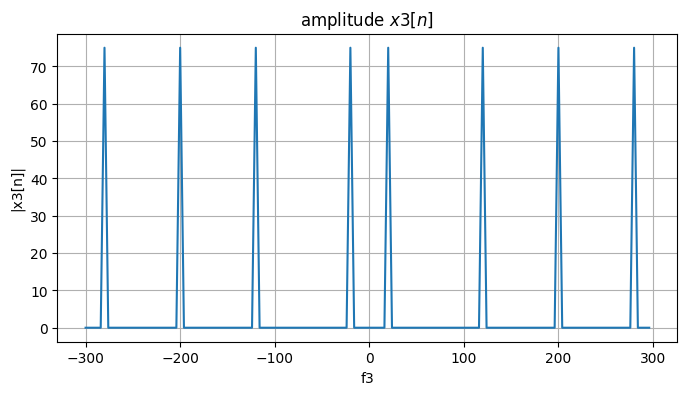

In [14]:
x3 = x1

ks = [5, 30, 80, 150, 250]

N2 = 150
fs = 600
n2 = np.arange(N2)

x3 = np.zeros(N2)

for k in (ks):
    x3 += np.sin(2 * np.pi * k / N2 * n2)

plot_time(x3, fs)

X3 = np.fft.fft(x3)
X3 = np.fft.fftshift(X3)
f3 = np.fft.fftfreq(N2, 1/fs)
f3 = np.fft.fftshift(f3)

plt.figure(figsize=(8, 4))
plt.plot(f3, np.abs(X3))
plt.xlabel('f3')
plt.ylabel('|x3[n]|')
plt.title('amplitude $x3[n]$')
plt.grid()
plt.show()

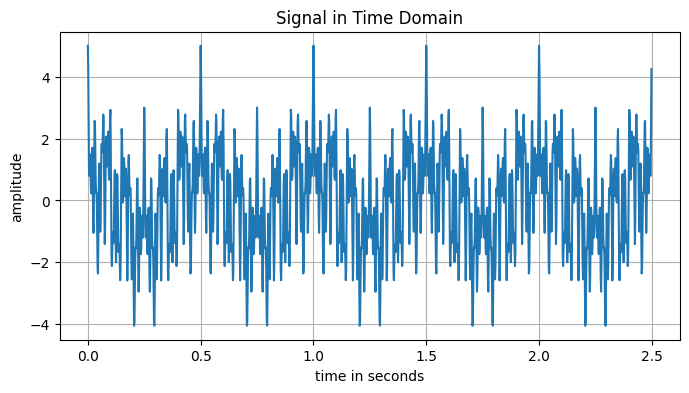

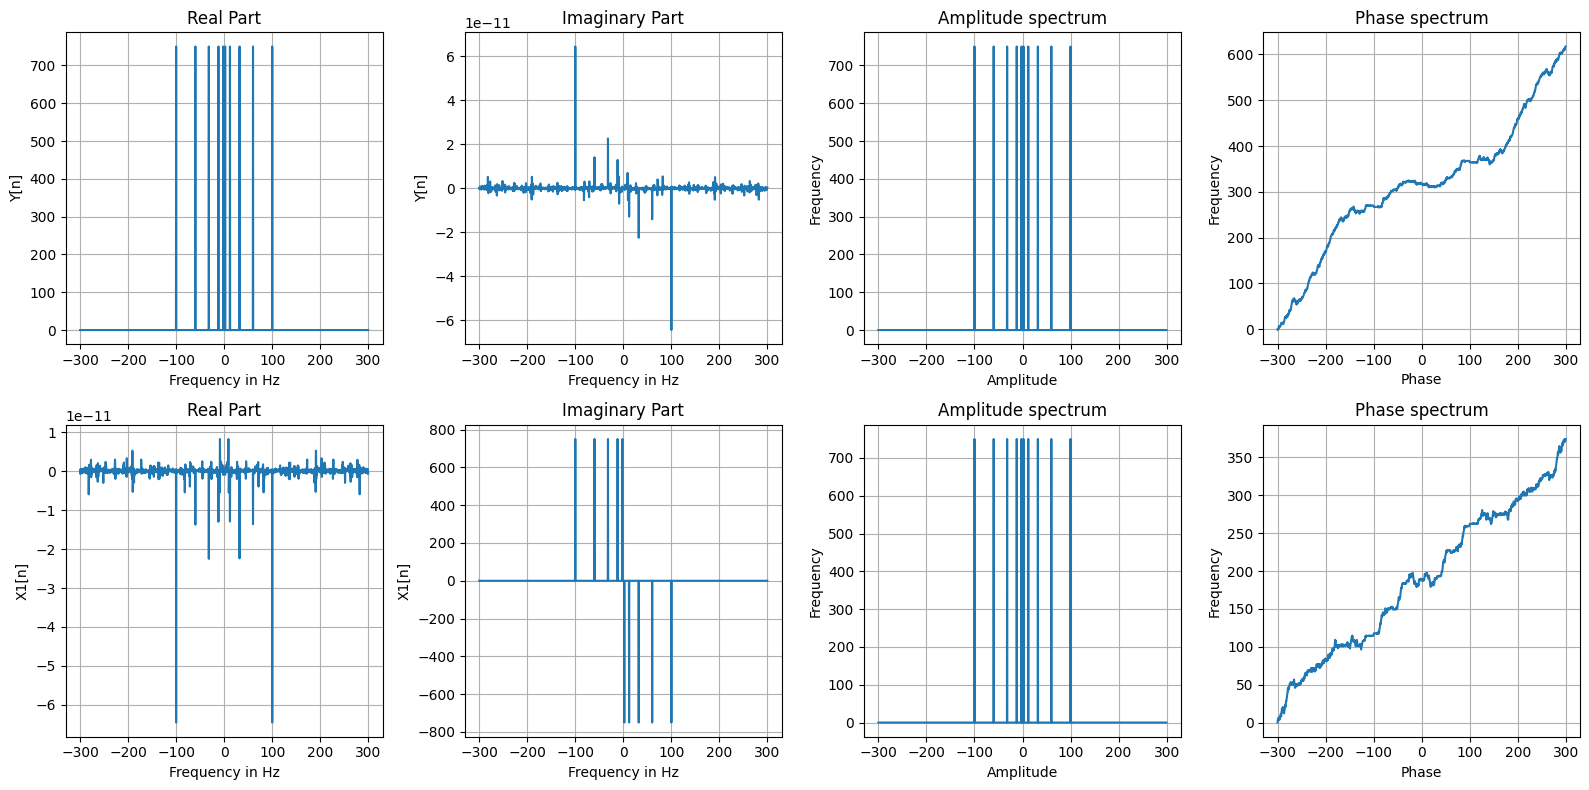

In [15]:
ks = [5, 30, 80, 150, 250]

N = 1500
fs = 600
n = np.arange(N)

y = np.zeros(N)

for k in (ks):
    y += np.cos(2 * np.pi * k / N * n)

plot_time(y, fs)

Y = np.fft.fft(y)
Y = np.fft.fftshift(Y)
f = np.fft.fftfreq(N, 1/fs)
f = np.fft.fftshift(f)

amplitude2 = np.abs(Y)
phase2 = np.unwrap(np.angle(Y))

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axs.flatten()

ax1.set_xlabel('Frequency in Hz')
ax1.set_ylabel('Y[n]')
ax1.set_title('Real Part')
ax1.grid()
ax1.plot(f, Y.real)

ax2.set_xlabel('Frequency in Hz')
ax2.set_ylabel('Y[n]')
ax2.set_title('Imaginary Part')
ax2.grid()
ax2.plot(f, Y.imag)

ax3.set_xlabel('Amplitude')
ax3.set_ylabel('Frequency')
ax3.set_title('Amplitude spectrum')
ax3.grid()
ax3.plot(f, amplitude2)

ax4.set_xlabel('Phase')
ax4.set_ylabel('Frequency')
ax4.set_title('Phase spectrum')
ax4.grid()
ax4.plot(f, phase2)


ax5.set_xlabel('Frequency in Hz')
ax5.set_ylabel('X1[n]')
ax5.set_title('Real Part')
ax5.grid()
ax5.plot(f, X1.real)

ax6.set_xlabel('Frequency in Hz')
ax6.set_ylabel('X1[n]')
ax6.set_title('Imaginary Part')
ax6.grid()
ax6.plot(f, X1.imag)

ax7.set_xlabel('Amplitude')
ax7.set_ylabel('Frequency')
ax7.set_title('Amplitude spectrum')
ax7.grid()
ax7.plot(f, amplitude)

ax8.set_xlabel('Phase')
ax8.set_ylabel('Frequency')
ax8.set_title('Phase spectrum')
ax8.grid()
ax8.plot(f, phase)

plt.tight_layout()
plt.show()

# Q3 - Spectral Analysis: The Hilbert Transform

# Q3 - Spectral Analysis: Multitaper

# Q3 - Spectral Analysis: The short-time Fourier Transform (stft)

# Q3 - Spectral Analysis: Discrete Cosine Transform (DCT)

# Q3 - Spectral Analysis: Discrete Wavelet Transform (DWT)